# **Imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# **Reading Data**

In [2]:
df = pd.read_csv('../Data/final_combined_data.csv')

# **Feature Engineering**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   50000 non-null  float64
 1   Longitude                  50000 non-null  float64
 2   Altitude                   50000 non-null  float64
 3   Distance                   50000 non-null  float64
 4   Alignment                  50000 non-null  bool   
 5   Distance_Sensors           50000 non-null  float64
 6   Proximity                  50000 non-null  bool   
 7   Wheel_Speed                50000 non-null  float64
 8   Velocity                   50000 non-null  float64
 9   Hall_Effect                50000 non-null  bool   
 10  Emergency_Stop             50000 non-null  bool   
 11  Temperature                50000 non-null  float64
 12  Humidity                   50000 non-null  float64
 13  Light_Level                50000 non-null  flo

In [4]:
df.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Alignment_Label', 'Safety_Label',
       'Collision_Avoidance_Label', 'Chaining_Unchaining_Label'],
      dtype='object')

In [5]:
# Relative Position and Angle
df["Relative_Distance"] = df["Distance"].diff()
df["Relative_Angle"] = df["Longitude"].diff()

In [6]:
# Relative Velocity
df["Relative_Velocity"] = df["Velocity"].diff()

In [7]:
# Time Series Features
window_size = 10
df["Rolling_Mean_Wheel_Speed"] = df["Wheel_Speed"].rolling(window=window_size).mean()
df["Rolling_Max_Distance"] = df["Distance"].rolling(window=window_size).max()

In [8]:
# Safety and Emergency Features
df["Safety_Activation"] = (df["Hall_Effect"] | df["Emergency_Stop"]).astype(int)
df["Safety_Duration"] = df.groupby((df["Safety_Activation"] != df["Safety_Activation"].shift()).cumsum())["Safety_Activation"].cumcount()


In [9]:
# Environmental Conditions Interaction
df["Temp_Humidity_Interact"] = df["Temperature"] * df["Humidity"]
df["Light_Temp_Interact"] = df["Light_Level"] * df["Temperature"]

In [10]:
# Alignment and Proximity Trends
window_size = 10
df["Alignment_Percentage"] = df["Alignment"].rolling(window=window_size).mean() * 100
df["Proximity_Trend"] = df["Proximity"].rolling(window=window_size).sum()

In [11]:
# Interaction Features
df["Alignment_Velocity_Interaction"] = df["Alignment"] * df["Velocity"]

In [12]:
# Estimate time to collision
df["Time_To_Collision"] = df["Distance"] / df["Velocity"]

In [13]:
# Save the updated combined data with new features to a new CSV file
# df.to_csv("combined_data_with_features.csv", index=False)

print("Combined data with new features saved.")

Combined data with new features saved.


In [14]:
df.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Alignment_Label', 'Safety_Label',
       'Collision_Avoidance_Label', 'Chaining_Unchaining_Label',
       'Relative_Distance', 'Relative_Angle', 'Relative_Velocity',
       'Rolling_Mean_Wheel_Speed', 'Rolling_Max_Distance', 'Safety_Activation',
       'Safety_Duration', 'Temp_Humidity_Interact', 'Light_Temp_Interact',
       'Alignment_Percentage', 'Proximity_Trend',
       'Alignment_Velocity_Interaction', 'Time_To_Collision'],
      dtype='object')

In [15]:
df.shape

(50000, 31)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        50000 non-null  float64
 1   Longitude                       50000 non-null  float64
 2   Altitude                        50000 non-null  float64
 3   Distance                        50000 non-null  float64
 4   Alignment                       50000 non-null  bool   
 5   Distance_Sensors                50000 non-null  float64
 6   Proximity                       50000 non-null  bool   
 7   Wheel_Speed                     50000 non-null  float64
 8   Velocity                        50000 non-null  float64
 9   Hall_Effect                     50000 non-null  bool   
 10  Emergency_Stop                  50000 non-null  bool   
 11  Temperature                     50000 non-null  float64
 12  Humidity                        

In [17]:
df.isna().sum()

Latitude                          0
Longitude                         0
Altitude                          0
Distance                          0
Alignment                         0
Distance_Sensors                  0
Proximity                         0
Wheel_Speed                       0
Velocity                          0
Hall_Effect                       0
Emergency_Stop                    0
Temperature                       0
Humidity                          0
Light_Level                       0
Alignment_Label                   0
Safety_Label                      0
Collision_Avoidance_Label         0
Chaining_Unchaining_Label         0
Relative_Distance                 1
Relative_Angle                    1
Relative_Velocity                 1
Rolling_Mean_Wheel_Speed          9
Rolling_Max_Distance              9
Safety_Activation                 0
Safety_Duration                   0
Temp_Humidity_Interact            0
Light_Temp_Interact               0
Alignment_Percentage        

In [18]:
numerical_columns = ['Relative_Distance', 'Relative_Angle', 'Relative_Velocity', 'Rolling_Mean_Wheel_Speed', 
'Rolling_Max_Distance', 'Alignment_Percentage', 'Proximity_Trend']

mean_values = df[numerical_columns].mean()
df[numerical_columns] = df[numerical_columns].fillna(mean_values)


In [19]:
df.isna().sum()

Latitude                          0
Longitude                         0
Altitude                          0
Distance                          0
Alignment                         0
Distance_Sensors                  0
Proximity                         0
Wheel_Speed                       0
Velocity                          0
Hall_Effect                       0
Emergency_Stop                    0
Temperature                       0
Humidity                          0
Light_Level                       0
Alignment_Label                   0
Safety_Label                      0
Collision_Avoidance_Label         0
Chaining_Unchaining_Label         0
Relative_Distance                 0
Relative_Angle                    0
Relative_Velocity                 0
Rolling_Mean_Wheel_Speed          0
Rolling_Max_Distance              0
Safety_Activation                 0
Safety_Duration                   0
Temp_Humidity_Interact            0
Light_Temp_Interact               0
Alignment_Percentage        

# **Prepping data for Prediction**

In [20]:
# Define the categorical columns for one-hot encoding
categorical_columns = ['Alignment_Label', 'Safety_Label', 'Collision_Avoidance_Label']

In [21]:
# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop="first")  # Drop the first category to avoid multicollinearity
encoded_features = encoder.fit_transform(df[categorical_columns])

/home/lowin/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# Get the category names from the encoder
category_names = encoder.get_feature_names_out(input_features=categorical_columns)

In [23]:
# Create a DataFrame for the encoded features with proper column names
encoded_df = pd.DataFrame(encoded_features, columns=category_names)

In [24]:
# Concatenate the encoded features with the original data
data_encoded = pd.concat([df, encoded_df], axis=1)

In [25]:
data_encoded.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Alignment_Label', 'Safety_Label',
       'Collision_Avoidance_Label', 'Chaining_Unchaining_Label',
       'Relative_Distance', 'Relative_Angle', 'Relative_Velocity',
       'Rolling_Mean_Wheel_Speed', 'Rolling_Max_Distance', 'Safety_Activation',
       'Safety_Duration', 'Temp_Humidity_Interact', 'Light_Temp_Interact',
       'Alignment_Percentage', 'Proximity_Trend',
       'Alignment_Velocity_Interaction', 'Time_To_Collision',
       'Alignment_Label_Not_Aligned', 'Safety_Label_Unsafe',
       'Collision_Avoidance_Label_Medium_Risk'],
      dtype='object')

In [26]:
data_encoded.isna().sum()

Latitude                                 0
Longitude                                0
Altitude                                 0
Distance                                 0
Alignment                                0
Distance_Sensors                         0
Proximity                                0
Wheel_Speed                              0
Velocity                                 0
Hall_Effect                              0
Emergency_Stop                           0
Temperature                              0
Humidity                                 0
Light_Level                              0
Alignment_Label                          0
Safety_Label                             0
Collision_Avoidance_Label                0
Chaining_Unchaining_Label                0
Relative_Distance                        0
Relative_Angle                           0
Relative_Velocity                        0
Rolling_Mean_Wheel_Speed                 0
Rolling_Max_Distance                     0
Safety_Acti

# **Machine Learning**

In [27]:
features = ['Latitude', 'Longitude', 'Altitude', 'Distance', 'Alignment',
       'Distance_Sensors', 'Proximity', 'Wheel_Speed', 'Velocity',
       'Hall_Effect', 'Emergency_Stop', 'Temperature', 'Humidity',
       'Light_Level', 'Relative_Distance', 'Relative_Angle', 'Relative_Velocity',
       'Rolling_Mean_Wheel_Speed', 'Rolling_Max_Distance', 'Safety_Activation',
       'Safety_Duration', 'Temp_Humidity_Interact', 'Light_Temp_Interact',
       'Alignment_Percentage', 'Proximity_Trend',
       'Alignment_Velocity_Interaction', 'Time_To_Collision',
       'Alignment_Label_Not_Aligned', 'Safety_Label_Unsafe',
       'Collision_Avoidance_Label_Medium_Risk']

target = 'Chaining_Unchaining_Label'

X = data_encoded[features]
y = data_encoded[target]

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Initialize a Random Forest classifier with adjusted hyperparameters
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, random_state=101)

In [31]:
# Implement cross-validation
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.999625 0.9995   1.       1.       0.99975 ]
Mean CV Score: 0.999775


In [32]:
# Train the classifier on the entire training data
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=101)

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


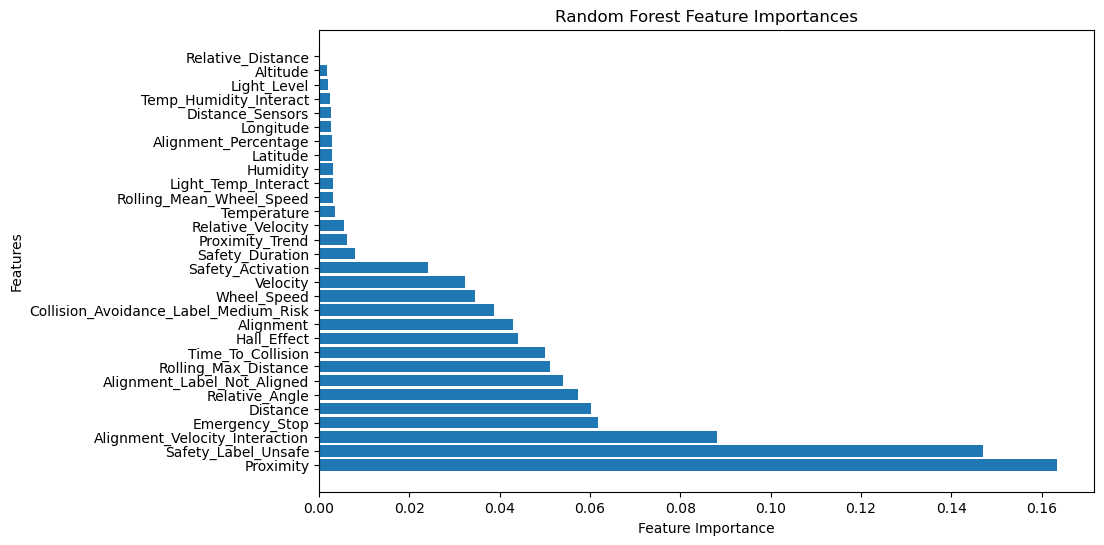

In [35]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()

In [36]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data['predicted_condition'] = y_pred
test_data

,Latitude,Longitude,Altitude,Distance,Alignment,Distance_Sensors,Proximity,Wheel_Speed,Velocity,Hall_Effect,...,Light_Temp_Interact,Alignment_Percentage,Proximity_Trend,Alignment_Velocity_Interaction,Time_To_Collision,Alignment_Label_Not_Aligned,Safety_Label_Unsafe,Collision_Avoidance_Label_Medium_Risk,Chaining_Unchaining_Label,predicted_condition
18447,37.449633,-121.757637,56.192057,0.1341,True,0.528012,False,1.579568,0.473870,True,...,18588.851452,40.0,6.0,0.473870,0.282989,0.0,1.0,0.0,Unchaining,Unchaining
17768,37.013862,-121.760487,0.575104,0.2304,False,0.764816,True,0.876198,0.262860,False,...,21963.130811,50.0,5.0,0.000000,0.876514,1.0,1.0,0.0,Unchaining,Unchaining
45879,37.917225,-121.997709,10.484071,0.2637,True,3.541222,True,1.317918,0.395376,True,...,15698.360264,50.0,5.0,0.395376,0.666961,0.0,0.0,0.0,Unchaining,Unchaining
16972,37.340817,-121.095234,0.647868,0.2916,True,1.604086,False,1.602309,0.480693,False,...,16756.043678,100.0,5.0,0.480693,0.606625,0.0,1.0,0.0,Unchaining,Unchaining
12165,37.490362,-121.980245,42.889388,0.0495,False,1.873052,True,4.623278,1.386983,True,...,1411.850537,30.0,6.0,0.000000,0.035689,1.0,1.0,0.0,Unchaining,Unchaining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40899,37.431495,-121.960800,37.368860,0.2697,False,1.854372,False,4.436796,1.331039,True,...,12810.346015,20.0,4.0,0.000000,0.202624,1.0,1.0,0.0,Unchaining,Unchaining
7806,37.895084,-121.333800,24.731299,0.2418,True,1.337885,True,3.629044,1.088713,False,...,7678.772533,50.0,8.0,1.088713,0.222097,0.0,1.0,0.0,Unchaining,Unchaining
41481,37.997585,-121.881123,75.900051,0.1443,False,0.545724,False,4.164567,1.249370,False,...,4932.838849,50.0,5.0,0.000000,0.115498,1.0,1.0,0.0,Unchaining,Unchaining
21802,37.530678,-121.777249,77.023358,0.2406,True,2.689856,False,4.030623,1.209187,False,...,16162.000888,50.0,4.0,1.209187,0.198977,0.0,1.0,0.0,Unchaining,Unchaining


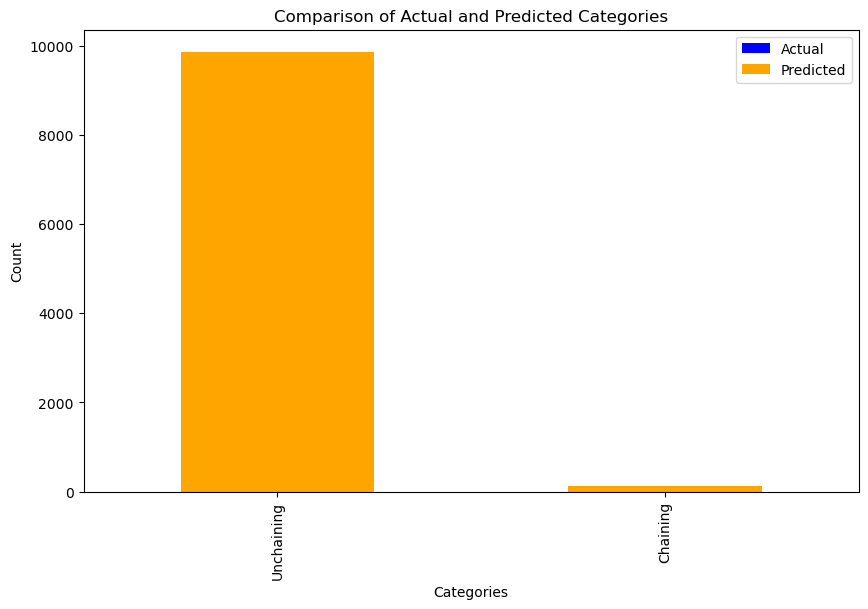

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Create a DataFrame to compare actual and predicted categories
comparison_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot a bar plot to compare actual and predicted categories
plt.figure(figsize=(10, 6))
comparison_data["Actual"].value_counts().plot(kind='bar', color='blue', label='Actual')
comparison_data["Predicted"].value_counts().plot(kind='bar', color='orange', label='Predicted')
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Comparison of Actual and Predicted Categories")
plt.legend()
plt.show()


In [38]:
df['Chaining_Unchaining_Label'].unique()

array(['Unchaining', 'Chaining'], dtype=object)

In [39]:
df.groupby(['Safety_Label']).count()
df.columns


# max_distance = 5.0  
# min_distance = 2.0

# # Cart wheel speed treshold in meters per second (m/s) for chaining 
# high_speed = 1.5

# # Define conditions for chaining based on the data
# chaining_conditions = [
#     alignment and distance > min_distance and distance < max_distance and not proximity and wheel_speed < high_speed and safety_label == "Safe"
    

selected_data = df[
    (df['Distance'] > 0.1) & (df['Distance'] < 0.5) &
    (df['Proximity'] == False) & (df['Alignment'] == True) &
    (df['Wheel_Speed'] < 2.5) & (df['Safety_Label'] == 'Safe')
]
selected_data
# df[(df['Safety_Label'] == 'Safe')].count()
# df[df['Wheel_Speed'] < 2.5].count()

,Latitude,Longitude,Altitude,Distance,Alignment,Distance_Sensors,Proximity,Wheel_Speed,Velocity,Hall_Effect,...,Rolling_Mean_Wheel_Speed,Rolling_Max_Distance,Safety_Activation,Safety_Duration,Temp_Humidity_Interact,Light_Temp_Interact,Alignment_Percentage,Proximity_Trend,Alignment_Velocity_Interaction,Time_To_Collision
362,37.800111,-121.097530,64.545603,0.1086,True,3.740689,False,1.875584,0.562675,True,...,2.390988,0.1086,1,0,938.238648,6933.056427,70.0,5.0,0.562675,0.193007
382,37.800103,-121.097512,64.545603,0.1146,True,1.199407,False,1.340529,0.402159,True,...,2.298037,0.1146,1,0,1262.643546,455.664612,50.0,4.0,0.402159,0.284962
492,37.800057,-121.097412,64.545603,0.1476,True,2.352136,False,2.133475,0.640042,True,...,2.292963,0.1476,1,11,652.591233,5229.247693,60.0,5.0,0.640042,0.230610
525,37.800041,-121.097383,64.545603,0.1575,True,2.318517,False,1.948360,0.584508,True,...,2.818602,0.1575,1,1,828.693829,12871.749116,80.0,8.0,0.584508,0.269457
545,37.800030,-121.097366,64.545603,0.1635,True,0.944546,False,0.620224,0.186067,True,...,3.073086,0.1635,1,1,592.779871,10585.207221,60.0,4.0,0.186067,0.878715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49815,37.643200,-121.015801,13.034533,0.2445,True,3.122301,False,0.794274,0.238282,True,...,3.514927,0.2445,1,1,1128.841831,13818.201518,70.0,4.0,0.238282,1.026095
49816,37.643199,-121.015801,13.034533,0.2448,True,4.646423,False,1.176542,0.352962,True,...,3.214119,0.2448,1,2,433.992508,3418.972262,70.0,3.0,0.352962,0.693558
49841,37.643181,-121.015784,13.034533,0.2523,True,3.852470,False,1.909756,0.572927,True,...,2.046891,0.2523,1,2,751.672756,6937.891859,30.0,5.0,0.572927,0.440370
49880,37.643151,-121.015758,13.034533,0.2640,True,4.249335,False,1.811028,0.543308,True,...,2.792679,0.2640,1,0,1479.693914,21597.803518,30.0,4.0,0.543308,0.485912
